In [1]:
import pandas as pd
from scipy import stats
#from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
#데이터 로드 및 확인
data = pd.read_csv('/content/app_data_d.csv')
print(len(data))
print(type(data))
data.head()

8884
<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Unnamed: 0.1,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8879,9361,10834,FR Calculator,FAMILY,4.0,7,2600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8880,9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"1,000 ~ 10,000",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8881,9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8882,9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000 ~ 10,000",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
8883,9365,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000 ~ 100,000,000",Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 가-1) 앱의 유/무료 여부(Type)에 따라 설치 횟수(Installs)가 유의미한 차이가 있을까?

8272
612


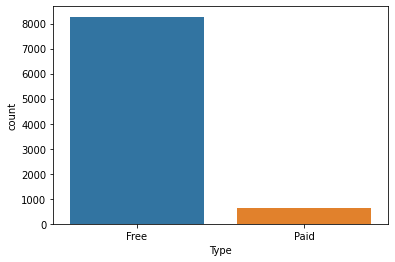

In [4]:
#Type 컬럼 확인
sns.countplot(x='Type', data=data)
print(len(data.loc[data['Type'] == 'Free']))
print(len(data.loc[data['Type'] == 'Paid']))

In [5]:
#데이터 추가 전처리(Installs 컬럼): 10억 건 이상 다운로드 횟수를 1억 건 이상 범주로 통합
data = data.replace('1,000,000,000+', '100,000,000 ~')

639
1123
1451
1626
2167
1400
478


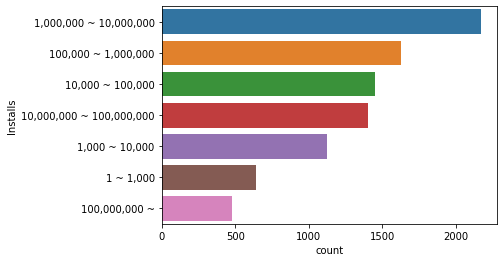

In [7]:
#Installs 컬럼 확인
sns.countplot(y = 'Installs', data=data, order = data['Installs'].value_counts().index)
print(len(data.loc[data['Installs'] == '1 ~ 1,000']))
print(len(data.loc[data['Installs'] == '1,000 ~ 10,000']))
print(len(data.loc[data['Installs'] == '10,000 ~ 100,000']))
print(len(data.loc[data['Installs'] == '100,000 ~ 1,000,000']))
print(len(data.loc[data['Installs'] == '1,000,000 ~ 10,000,000']))
print(len(data.loc[data['Installs'] == '10,000,000 ~ 100,000,000']))
print(len(data.loc[data['Installs'] == '100,000,000 ~']))

In [8]:
#분할표 만들기 (독립변수 x: Type, 종속변수 y: Installs)
result = pd.crosstab(data.Installs, data.Type)
result

Type,Free,Paid
Installs,,
"1 ~ 1,000",503,136
"1,000 ~ 10,000",927,196
"1,000,000 ~ 10,000,000",2146,21
"10,000 ~ 100,000",1292,159
"10,000,000 ~ 100,000,000",1397,3
"100,000 ~ 1,000,000",1529,97
"100,000,000 ~",478,0


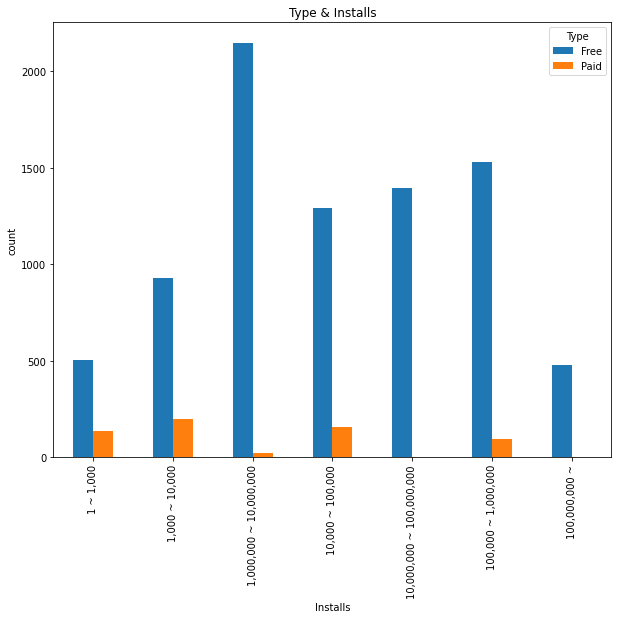

In [9]:
#시각화
ax = result.plot(kind='bar', title='Type & Installs', figsize= (10,8))
ax.set_ylabel('count')
plt.show()

In [14]:
#H0: Type과 Installs 두 변수는 독립이다. (관련이 없다.)
#H1: Type과 Installs 두 변수는 관련이 있다.
chi2, pval, dof, ex = chi2_contingency(result)
print(chi2)
print(pval)

# p-value < 0.05, reject H0, Type과 Installs간 상관관계가 있다.

692.4270264117063
2.6396630873980055e-146


### 가-2) 앱의 대상 연령대(Content Rating)에 따라 설치 횟수(Installs)가 유의미한 차이가 있을까?



7089
1380
414


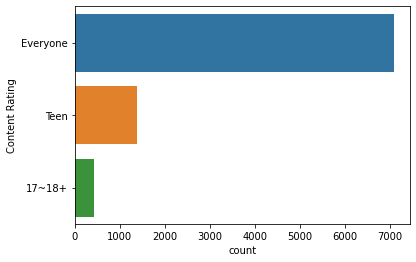

In [17]:
#Content Rating 컬럼 확인
sns.countplot(y='Content Rating', data=data)
print(len(data.loc[data['Content Rating'] == 'Everyone']))
print(len(data.loc[data['Content Rating'] == 'Teen']))
print(len(data.loc[data['Content Rating'] == '17~18+']))

In [16]:
#데이터 추가 전처리(Content Rating 컬럼): Everyone 10+를 Teen으로 통합
data = data.replace('Everyone 10+', 'Teen')

#데이터 추가 전처리(Content Rating 컬럼): Mature 17+와 Adults only 18+를 17~18+로 통합
data = data.replace('Mature 17+', '17~18+')
data = data.replace('Adults only 18+', '17~18+')

#데이터 추가 전처리(Content Rating 컬럼): Unrated 삭제
idx = data[data['Content Rating'] == 'Unrated'].index
data.drop(idx, inplace=True)

In [18]:
#분할표 만들기 (독립변수 x: Content Rating, 종속변수 y: Installs)
result2 = pd.crosstab(data['Installs'], data['Content Rating'])
result2

Content Rating,17~18+,Everyone,Teen
Installs,,,
"1 ~ 1,000",27,560,52
"1,000 ~ 10,000",27,1003,93
"1,000,000 ~ 10,000,000",108,1663,396
"10,000 ~ 100,000",51,1233,166
"10,000,000 ~ 100,000,000",76,1015,309
"100,000 ~ 1,000,000",105,1277,244
"100,000,000 ~",20,338,120


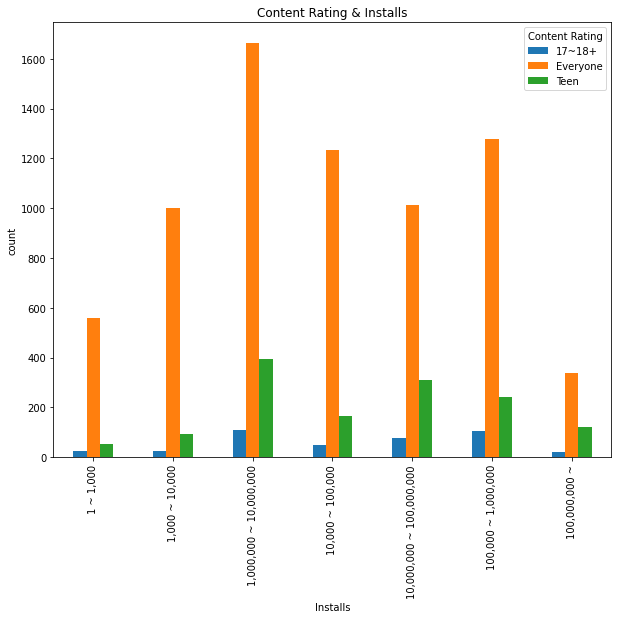

In [27]:
#시각화
ax = result2.plot(kind='bar', title='Content Rating & Installs', figsize= (10,8))
ax.set_ylabel('count')
plt.show()

In [19]:
#H0: Content Rating과 Installs 두 변수는 독립이다. (관련이 없다.)
#H1: Content Rating과 Installs 두 변수는 관련이 있다.

chi2, pval, dof, ex = chi2_contingency(result2)
print(chi2)
print(pval)

# p-value < 0.05, reject H0, Content Rating과 Installs간 상관관계가 있다.

223.71285900758988
4.0287210119926523e-41


### 가-3) 앱의 카테고리(Category)에 따라 설치 횟수(Installs)가 유의미한 차이가 있을까?


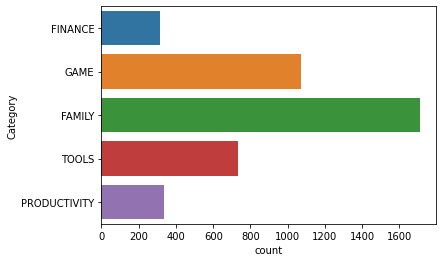

In [22]:
#Category 컬럼 확인
sns.countplot(y='Category', data=data)

In [21]:
category_count = data.groupby('Category').size()
category_count
# 카테고리가 너무 많으므로 상위 5개 카테고리만 추출하여 데이터 재구성
# (FAMILY 1712, GAME 1074, TOOLS 732, PRODUCTIVITY 334, FINANCE 317)
data2 = data[(data['Category']=='FAMILY')|(data['Category']=='GAME')|(data['Category']=='TOOLS')
              |(data['Category']=='PRODUCTIVITY')|(data['Category']=='FINANCE')]
data2

,Unnamed: 0,Unnamed: 0.1,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
839,985,1048,K PLUS,FINANCE,4.4,124424,NaN,"10,000,000 ~ 100,000,000",Free,0.0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up
840,986,1049,ING Banking,FINANCE,4.4,39041,NaN,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Finance,"August 3, 2018",Varies with device,Varies with device
841,987,1050,Citibanamex Movil,FINANCE,3.6,52306,42000.0,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up
842,988,1051,The postal bank,FINANCE,3.7,36718,NaN,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Finance,"July 16, 2018",Varies with device,Varies with device
843,989,1052,KTB Netbank,FINANCE,3.8,42644,19000.0,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Finance,"June 28, 2018",8.18,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,9353,10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,"1,000 ~ 10,000",Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
8873,9355,10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13000.0,"1,000 ~ 10,000",Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
8879,9361,10834,FR Calculator,FAMILY,4.0,7,2600.0,"1 ~ 1,000",Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8880,9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"1,000 ~ 10,000",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


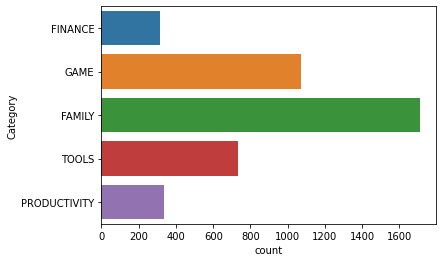

In [23]:
# data2의 Category 컬럼 확인
sns.countplot(y='Category', data=data2)

In [24]:
#분할표 만들기 (독립변수 x: Category, 종속변수 y: Installs)
result3 = pd.crosstab(data2['Installs'], data2['Category'])
result3

Category,FAMILY,FINANCE,GAME,PRODUCTIVITY,TOOLS
Installs,,,,,
"1 ~ 1,000",142,18,34,27,58
"1,000 ~ 10,000",265,54,50,43,115
"1,000,000 ~ 10,000,000",386,85,267,79,140
"10,000 ~ 100,000",322,85,102,35,148
"10,000,000 ~ 100,000,000",209,20,302,56,109
"100,000 ~ 1,000,000",357,52,174,49,125
"100,000,000 ~",31,3,145,45,37


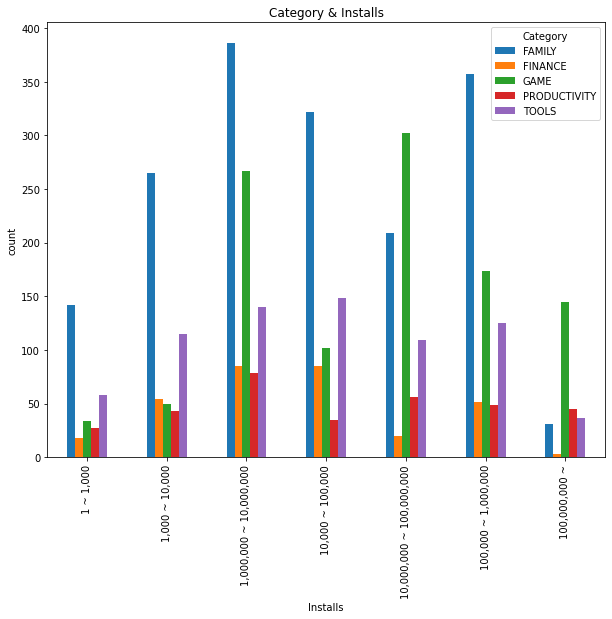

In [25]:
#시각화
ax = result3.plot(kind='bar', title='Category & Installs', figsize= (10,8))
ax.set_ylabel('count')
plt.show()

In [26]:
#H0: Category와 Installs 두 변수는 독립이다. (관련이 없다.)
#H1: Category와 Installs 두 변수는 관련이 있다.

chi2, pval, dof, ex = chi2_contingency(result3)
print(chi2)
print(pval)

# p-value < 0.05, reject H0, Category와 Installs간 상관관계가 있다.

511.27877429020276
7.568272807028033e-93
